In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [42]:
start = '2014-01-01'
end = '2024-06-30'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [43]:
data.reset_index(inplace=True)

In [44]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2635,2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300
2636,2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700
2637,2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700
2638,2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700


In [45]:
ma_100_days = data.Close.rolling(100).mean()

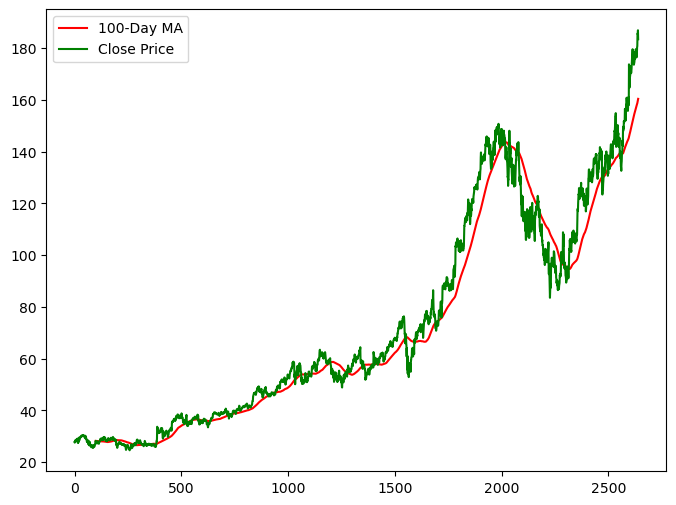

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='100-Day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend(loc='upper left')
plt.show()

In [47]:
ma_200_days = data.Close.rolling(200).mean()

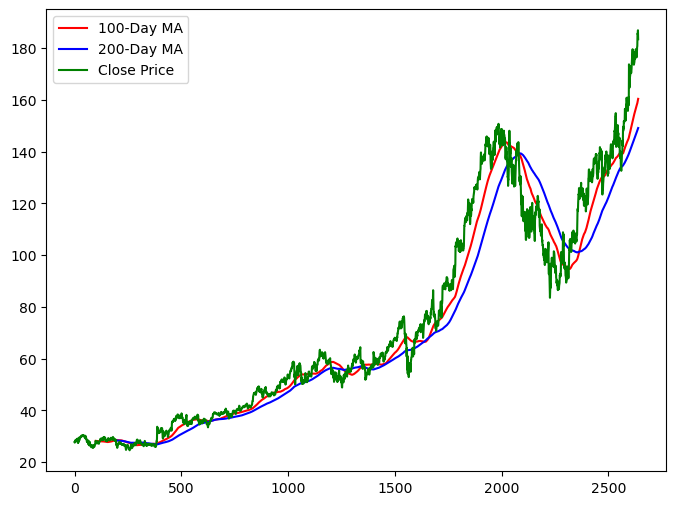

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r', label='100-Day MA')
plt.plot(ma_200_days, 'b', label='200-Day MA')
plt.plot(data.Close, 'g', label='Close Price')
plt.legend(loc='upper left')
plt.show()

In [49]:
data.dropna(inplace=True)

In [50]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [51]:
data_train.shape[0], data_test.shape[0]

(2112, 528)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))

In [53]:
data_train_scale = scaler.fit_transform(data_train)

In [54]:
x=[]
y=[]

In [56]:
for i in range (100, data_train_scale. shape [0]):
    x. append(data_train_scale[i-100:i])
    y. append (data_train_scale[i,0])

In [57]:
x, y = np.array(x), np.array(y)

In [58]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [60]:
model = Sequential()
model. add (LSTM(units = 50, activation = 'relu', return_sequences = True,
                 input_shape = ((x. shape[1],1) )))
model. add (Dropout (0.2))

model. add(LSTM(units = 60, activation='relu', return_sequences = True))
model. add (Dropout(0.3))

model. add (LSTM(units = 80, activation = 'relu', return_sequences = True))
model. add (Dropout (0.4))

model. add (LSTM(units = 120, activation = 'relu'))
model. add (Dropout (0.5))

model. add (Dense (units =1))

In [61]:
model.compile(optimizer = 'adam' ,loss = 'mean_squared_error')

In [62]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0545
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0064
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0052
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0058
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0048
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0053
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0052
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0044
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0036
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0041
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0040
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0036
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0038
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0037
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - lo

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [65]:
pas_100_days = data_train.tail(100)

In [66]:
data_test =pd.concat([pas_100_days, data_test], ignore_index=True)

In [68]:
data_test_scale = scaler.fit_transform(data_test)

In [71]:
x=[]
y=[]
for i in range (100, data_test_scale. shape [0]):
    x. append(data_test_scale[i-100:i])
    y. append (data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [72]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [77]:
scale = 1/scaler.scale_

In [78]:
y_predict = y_predict*scale

In [79]:
y = y*scale

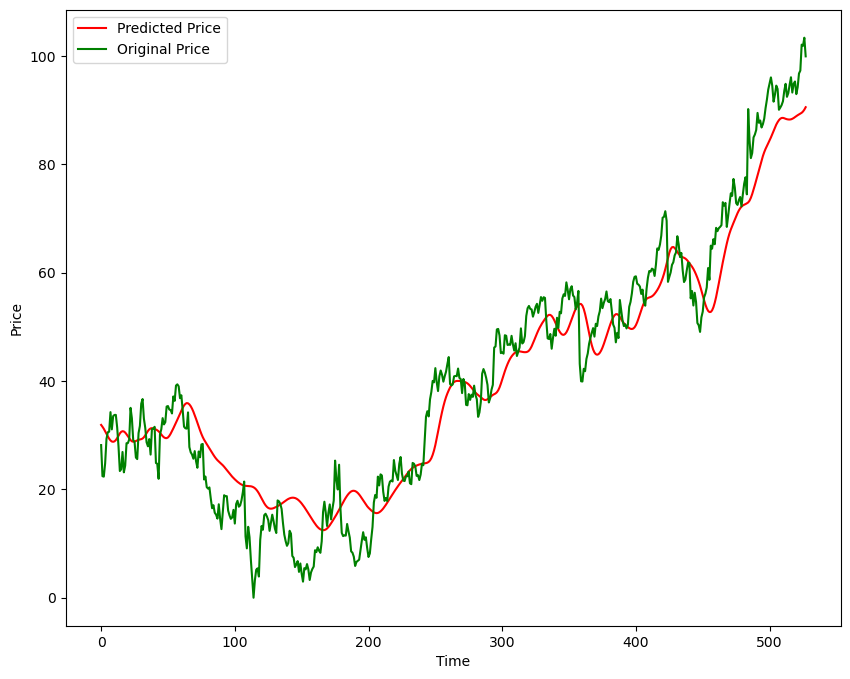

In [81]:
plt.figure(figsize=(10,8)) 
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel( 'Time')
plt.ylabel( 'Price')
plt.legend()
plt.show()

In [84]:
model. save('Stock Predictions Model.keras')